<h1 style="text-align:center; font-family:Georgia; "><b>Car Price Predictor </b></h1> 

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#ffefd5;  
            font-size:100%;
            theme: cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>About:</b>
</h3>
<p style="padding-left: 20px; padding-right: 20px; color:#4a4a4a; font-size:110%;">
CarDekho is India's leading car search venture that helps users buy cars. It's website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.
<br><br>
In this project, we'll collect data about used cars from the CarDekho website, find out relation between features and selling price of cars using data analysis and then use different Machine Learning Models to build a good price predictor.
</p>
</div>

### 1. Importing the Dependencies

In [75]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import warnings
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

### 2. Data Collection and Processing

In [76]:
#reading the dataset from csv file
df =pd.read_csv('Car details v3.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0


In [77]:
#checking the number of rows and columns
df.shape

(8128, 12)

In [78]:
#Getting some information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [79]:
#counting unique Categorical Variables
df.describe(include=object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power
count,8128,8128,8128,8128,8128,7907,7907,7913
unique,2058,4,3,2,5,393,121,322
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp
freq,129,4402,6766,7078,5289,225,1017,377


In [80]:
#counting unique Numeric Variables
print('Year:',df.year.nunique())
print('Selling Price:',df.selling_price.nunique())
print('Km_driven:',df.km_driven.nunique())
print('Seats:',df.seats.nunique())

Year: 29
Selling Price: 677
Km_driven: 921
Seats: 9


In [81]:
#checking the number of missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [82]:
#checking the time period of the dataset
print('Oldest car',df.year.min())
print('Newest car',df.year.max())

Oldest car 1983
Newest car 2020


In [83]:
#replacing the infinity to NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [84]:
#checking the NaN rows
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN


In [85]:
#Counting no of NaN
nan_df.shape

(221, 12)

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#ffefd5;  
            font-size:100%;
            theme: cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>Overview</b>
</h3>
<p style="padding-left: 20px; padding-right: 20px; color:#4a4a4a; font-size:110%;">
The dataset belongs to "CarDekho.com" an online platform for used cars. The cars here are from year <b>1983</b> till <b>2020 </b>.It has  <b>8128</b>  entries and 11 columns.
   
</p> 
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>Numeric variables: 4</li>
    <li>Categorical variables: 8</li>
    <li>Number of observations: 8128</li>
    <li>Missing cells : 221</li>
</ul>
</div>

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#ffefd5;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>Variables</b>
</h3>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li><b>Name:</b> <b>2058</b> distinct values</li>
    <li><b>Year</b>: <b>29</b> distinct values</li>
    <li><b>selling_price</b>: <b>677</b> distinct values</li>
    <li><b>km_driven</b>: <b>921</b> distinct values</li>
    <li><b>fuel</b>: <b>4</b> distinct values</li>
    <li><b>seller_type</b>: <b>3</b> distinct values</li>
    <li><b>transmission</b>: <b>2</b> distinct values</li>
    <li><b>owner</b>: <b>5</b> distinct values</li>
    <li><b>mileage</b>: <b>393</b> distinct values</li>
    <li><b>engine</b>: <b>121</b> distinct values</li>
    <li><b>max_power</b>:<b>332</b> distinct values</li>
    <li><b>seats</b>: <b>9</b> distinct values</li>
</ul>
</div>

### 3. Cleaning the data

In [86]:
#we now remove the NaN rows from main dataframe
df =df.dropna()

In [87]:
#checking wether we have any NaN columns left
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [88]:
#We create a function to extract numerical values from the object data
def get_value(value):
    return value.split(' ')[0]

#turning mileage from object datatype to float datatype
df['Mileage'] =df['mileage'].apply(lambda x: get_value(x))
df['Mileage'] =df['Mileage'].astype('float')

#turning engine from object datatype to float datatype
df['EngineCapacity'] =df['engine'].apply(lambda x: get_value(x))
df['EngineCapacity'] =df['EngineCapacity'].astype('int64')

#turning maxpower from object datatype to float datatype
df['MaxPower'] =df['max_power'].apply(lambda x: get_value(x))
df['MaxPower'] = pd.to_numeric(df['MaxPower'], errors='coerce')
df['MaxPower'] =df['MaxPower'].astype('float')


In [89]:
#we use the same function to extract the company name
df['Company']=df['name'].apply(lambda x: get_value(x))

In [90]:
#we create a column dor how old is the car
now_year = datetime.datetime.now().year
df["years_old"] = now_year - df.year

In [91]:
#dropping the mileage,engine and max_power columns
df=df.drop(['mileage','engine','max_power','year'],axis=1)

In [92]:
#we replace the infinity values to 0
df=df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

### 4.We do some data analysis

In [93]:
#we create a new dataframe for data analysis
df1=df.copy()

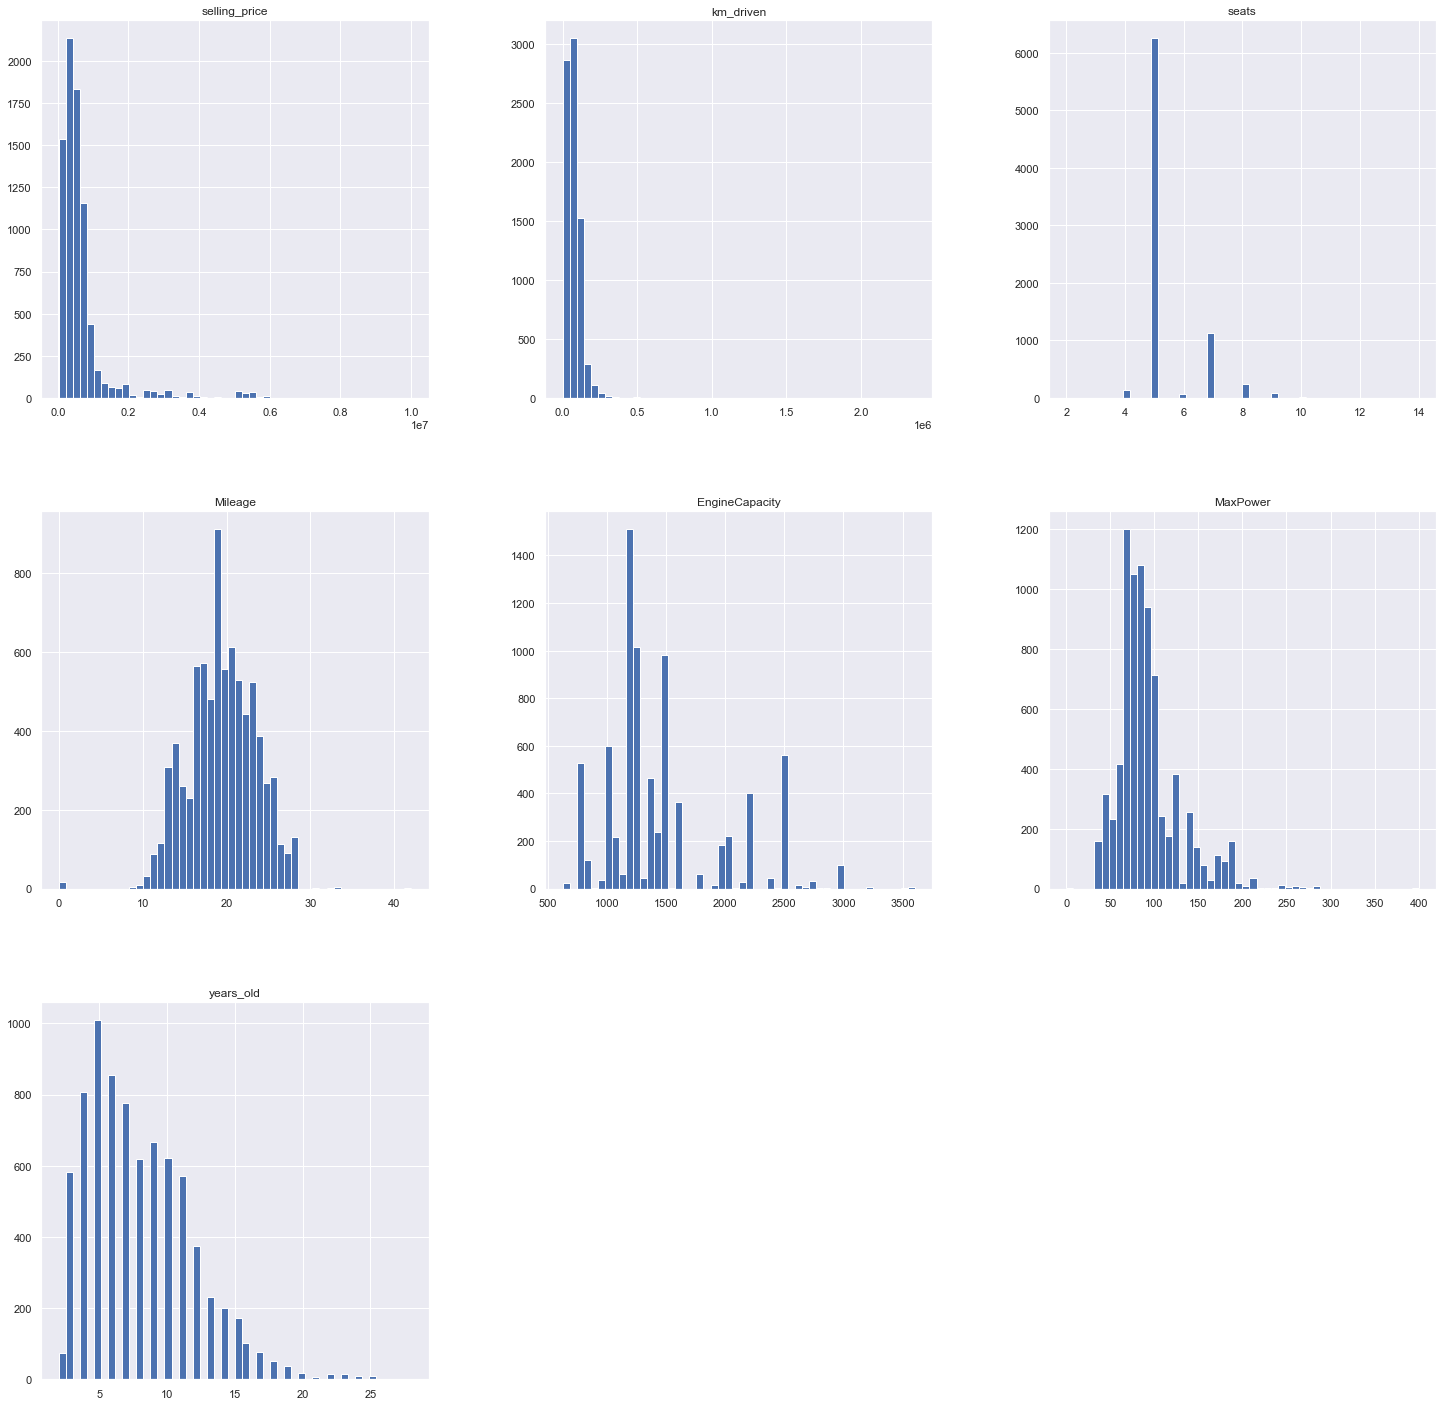

In [94]:
#create a histogram to check the values
df1.hist(bins=50,figsize=(25,25))
plt.show()

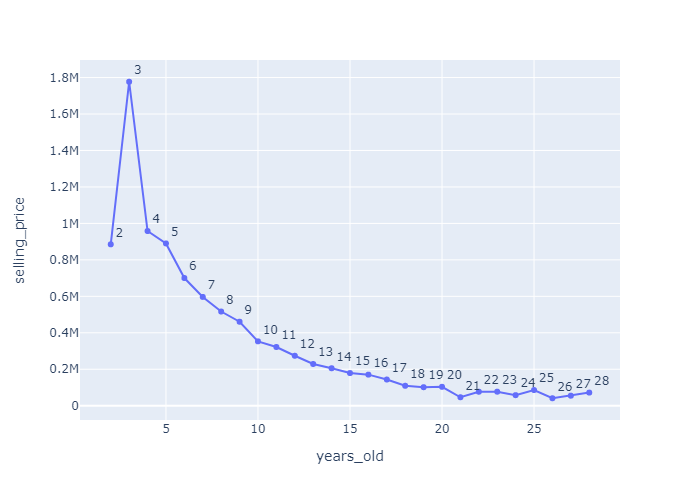

In [95]:
#Observing Selling price and its relation with age of car
avg_price_for_age = df1.groupby("years_old").selling_price.mean().reset_index()
fig = px.line(avg_price_for_age, x='years_old', y='selling_price', text="years_old")
fig.update_traces(textposition="top right")
fig.show(renderer="png")

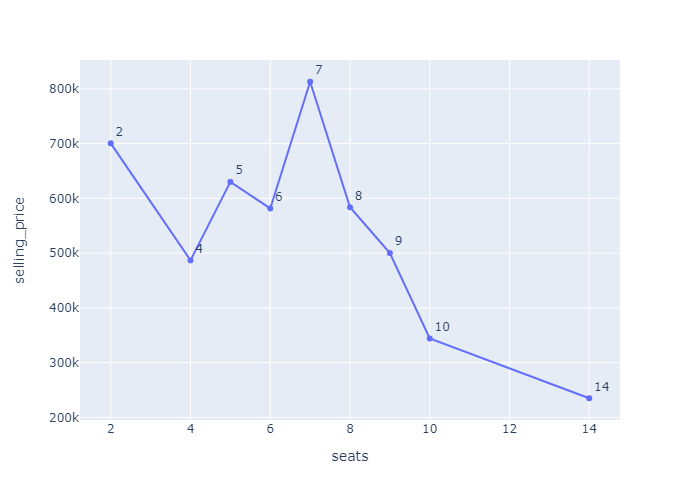

In [96]:
#observing The impact of seats on the price of car
avg_price_for_seats = df1.groupby("seats").selling_price.mean().reset_index()
fig = px.line(avg_price_for_seats, x='seats', y='selling_price', text="seats")
fig.update_traces(textposition="top right")
fig.show(renderer="png")

In [97]:
#we create a new column for km driven so as to group it for data analysis
df1['km_drivem_per1000']=df1['km_driven']/1000

In [98]:
#we create a function which counts km driven 
def counter(x):
    if x<20:
        return '0-20'
    elif x>=20 and x<40:
        return '20-40'
    elif x>=40 and x<60:
        return '40-60'
    elif x>=60 and x<80:
        return '60-80'
    elif x>=80 and x<100:
        return '80-100'
    elif x>=100 and x<150:
        return '100-150'
    elif x>=150 and x<200:
        return '150-200'
    elif x>=200 and x<250:
        return '200-250'
    else :
        return '250+'

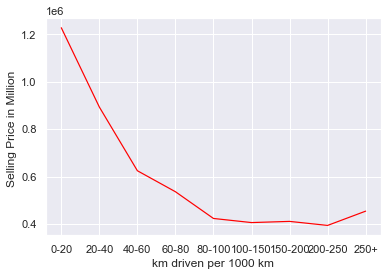

In [99]:
#Observving Km driven and their selling price
df1['km_range']=df1['km_drivem_per1000'].apply(counter)
avg_price_per_category = df1.groupby('km_range').mean()['selling_price']
avg_price_per_category=avg_price_per_category.sort_index().to_frame()
reorderlist = ['0-20','20-40','40-60','60-80','80-100','100-150','150-200','200-250','250+']
avg_price_per_category=avg_price_per_category.reindex(reorderlist)

plt.xlabel('km driven per 1000 km')
plt.ylabel('Selling Price in Million ')
plt.plot(avg_price_per_category.index,avg_price_per_category.selling_price,color='red',linewidth=1.2)
sns.set(rc={'figure.figsize':(12,10)})
plt.show()

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

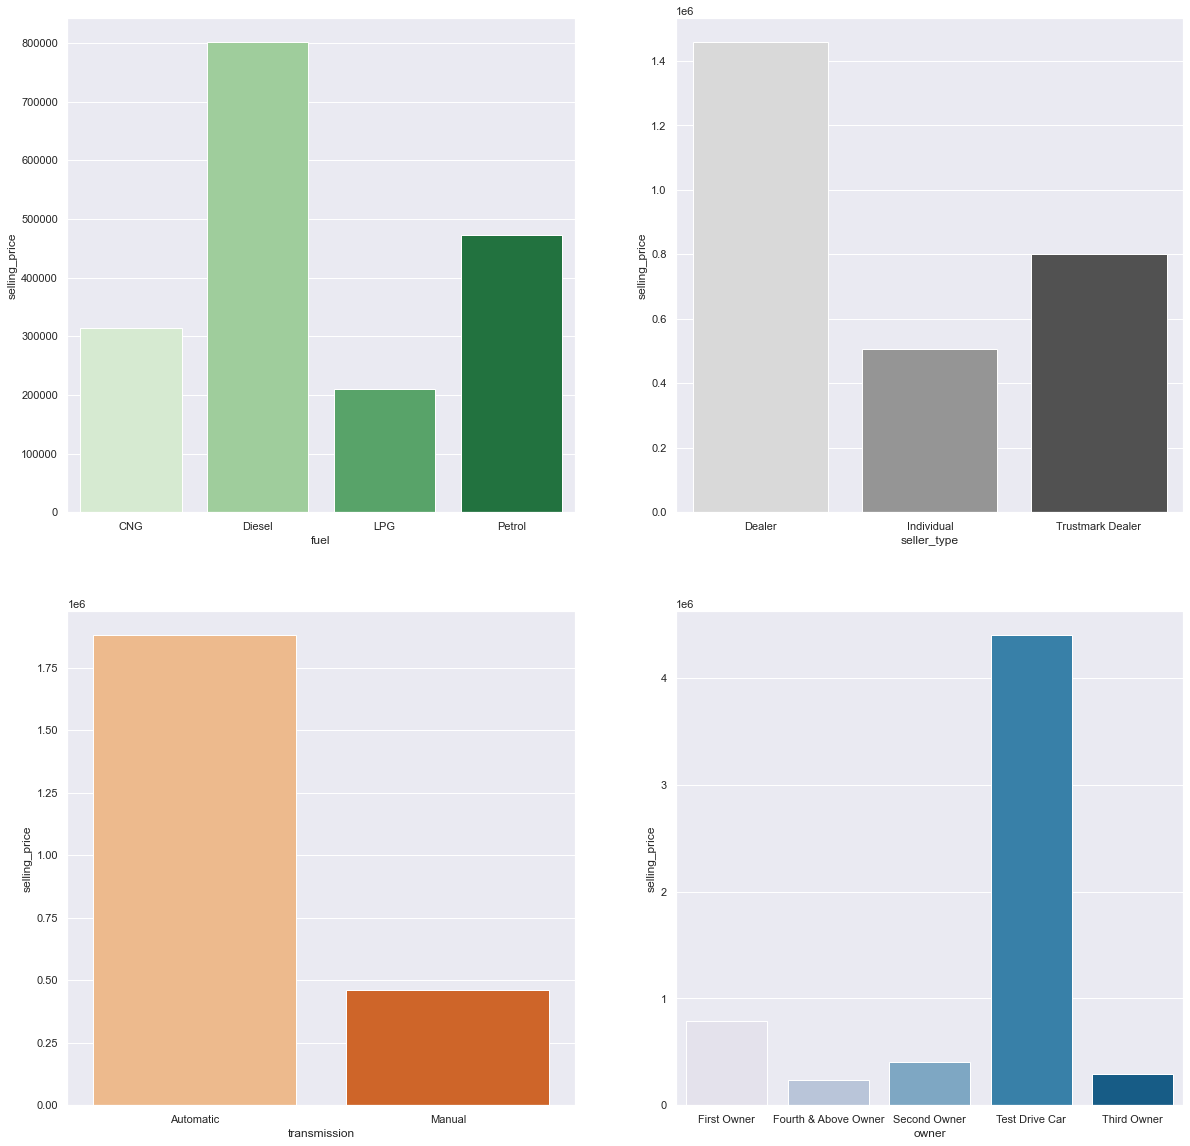

In [100]:
#Observing the relation of Fuel, Seller Type, Transmission and Owner's Relation with Selling Price
avg_price_fuel = df.groupby("fuel").selling_price.mean().reset_index()
avg_price_seller_type = df.groupby("seller_type").selling_price.mean().reset_index()
avg_price_transmission = df.groupby("transmission").selling_price.mean().reset_index()
avg_price_owner = df.groupby("owner").selling_price.mean().reset_index()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
sns.barplot(data=avg_price_fuel, x='fuel', y='selling_price',ax=axes[0,0],palette="Greens")
sns.barplot(data=avg_price_seller_type, x='seller_type', y='selling_price',ax=axes[0,1],
palette="Greys")
sns.barplot(data=avg_price_transmission, x='transmission', y='selling_price',ax=axes[1,0],
palette="Oranges")
sns.barplot(data=avg_price_owner, x='owner', y='selling_price',ax=axes[1,1],
palette="PuBu")

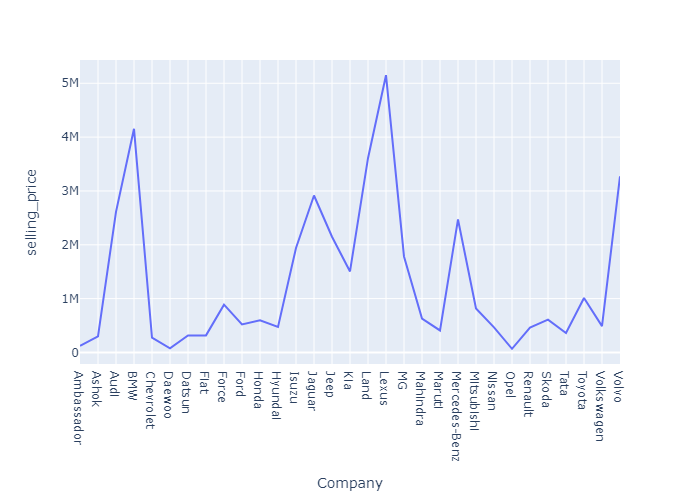

In [101]:
# Observing Brand name vs Selling Price
avg_price_Company = df.groupby("Company").selling_price.mean().reset_index()
fig = px.line(avg_price_Company, x='Company', y='selling_price')
fig.update_traces(textposition="top right")
fig.show(renderer="png")

<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#ffefd5;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>The above Analysis gives us features which have highest selling price in their respective category </b>
</h3>
<ol style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li>People like to pay more for <b>3</b>  year old cars.</li>
    <li><b>7</b> seater cars fetch good price.</li>
    <li>Its obvious people will pay more for cars which has not been used more so <b>0-20 km</b> driven car sells at higher rate.</li>
    <li>Cars operating on <b>Diesel</b> sells at higher price.</li>
    <li><b>Dealers</b> have High selling price.</li>
    <li>In terms of transmission <b>Automatic</b> transmission gives higher price.</li>
    <li><b>Test Drive</b> cars have the highest selling price.</li>
    <li><b>Lexus</b> gets the highest selling price in used cars.</li>
</ol>
</div>

### 5.Encoding the categorical data

In [102]:
# encoding the "fuel" column
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)

# encoding the "seller_type" column
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

# encoding the "transmission" column
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

# encoding the "owner" column
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

#encoding the 'Company' column
df.replace({'Company':{'Ambassador':0,'Ashok':1,'Audi':2,'BMW':3,'Chevrolet':4,'Daewoo':5,'Datsun':6,'Fiat':7,'Force':8,'Ford':9,'Honda':10,
                       'Hyundai':11,'Isuzu':12,'Jaguar':13,'Jeep':14,'Kia':15,'Land':16,'Lexus':17,'MG':18,'Mahindra':19,'Maruti':20,'Mercedes-Benz':21,
                       'Mitsubishi':22,'Nissan':23,'Opel':24,'Renault':25,'Skoda':26,'Tata':27,'Toyota':28,'Volkswagen':29,'Volvo':30}},inplace=True)

In [103]:
# changing seats from float64 to int
df['seats']=df['seats'].astype('int64')

In [104]:
#checking the dataframe
df.sample(10)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage,EngineCapacity,MaxPower,Company,years_old
726,Maruti Eeco 7 Seater Standard BSIV,145000,50000,1,0,0,1,7,15.37,1196,73.00,20,11
1344,Hyundai i20 Asta Option 1.2,495000,30000,1,1,0,0,5,18.60,1197,81.83,11,7
1107,Volvo XC40 D4 Inscription BSIV,3800000,20000,0,0,1,0,5,18.00,1969,190.00,30,3
7477,Maruti Wagon R LX,65000,198000,1,0,0,1,5,18.90,998,67.10,20,16
7799,Tata New Safari Dicor VX 4X2,300000,175000,0,0,0,1,7,13.93,2179,138.10,27,16
5636,Hyundai Creta 1.6 CRDi AT SX Plus,1000000,60000,0,0,1,1,5,17.01,1582,126.20,11,5
462,Maruti Ertiga VXI,610000,21000,1,0,0,0,7,16.02,1373,93.70,20,8
4114,Tata Safari Storme EX,503000,110000,0,0,0,0,7,14.10,2179,147.94,27,7
910,Maruti 800 AC,90000,90000,1,0,0,0,4,16.10,796,37.00,20,15
2947,Hyundai i10 Sportz 1.1L LPG,375000,60000,3,0,0,0,5,19.20,1086,68.05,11,7


### 6.Splitting the data and target

In [105]:
#creating data and target variables
X= df.drop(['name','selling_price'],axis=1)
Y = df['selling_price']
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
7902    320000
7903    135000
7904    382000
7905    290000
7906    290000
Name: selling_price, Length: 7907, dtype: int64

In [106]:
#printing the data
X

,km_driven,fuel,seller_type,transmission,owner,seats,Mileage,EngineCapacity,MaxPower,Company,years_old
0,145500,0,0,0,0,5,23.40,1248,74.00,20,8
1,120000,0,0,0,1,5,21.14,1498,103.52,26,8
2,140000,1,0,0,2,5,17.70,1497,78.00,10,16
3,127000,0,0,0,0,5,23.00,1396,90.00,11,12
4,120000,1,0,0,0,5,16.10,1298,88.20,20,15
...,...,...,...,...,...,...,...,...,...,...,...
7902,110000,1,0,0,0,5,18.50,1197,82.85,11,9
7903,119000,0,0,0,3,5,16.80,1493,110.00,11,15
7904,120000,0,0,0,0,5,19.30,1248,73.90,20,13
7905,25000,0,0,0,0,5,23.57,1396,70.00,27,9


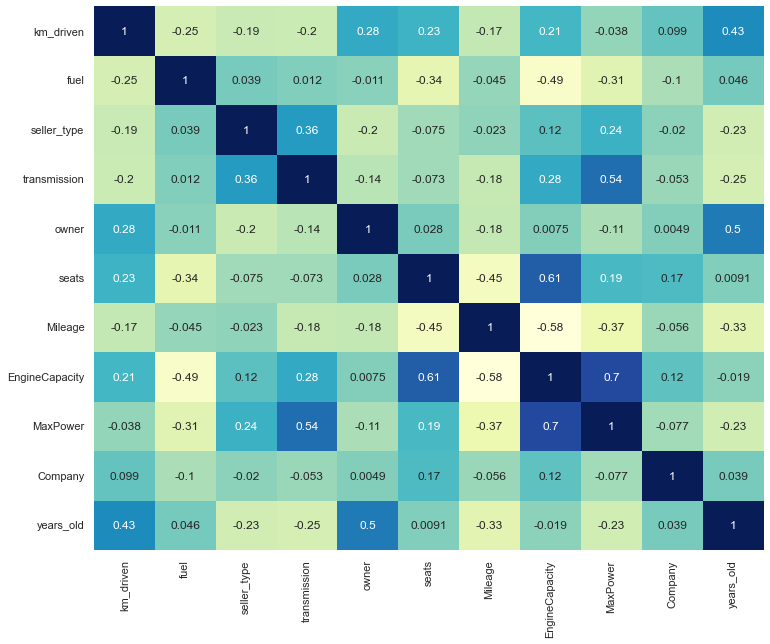

In [107]:
#checking corelation between variables
correlation =X.corr()
sns.heatmap(X.corr(),cmap="YlGnBu",cbar=False, annot=True)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

In [108]:
#we observe that Engine capacity and max power are highly corelated, we drop Max Power
X.drop('MaxPower',axis=1,inplace=True)

### 7.Splitting Training data and Test data

In [109]:
#splitting into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("Train set shape: ",X_train.shape)
print("Test set shape :  ",X_test.shape)

Train set shape:  (6325, 10)
Test set shape :   (1582, 10)


### 8.Model Training

##### 1. Linear Regression

In [110]:
# loading the linear regression model
lin_reg = LinearRegression()

In [111]:
#training the model
lin_reg.fit(X_train,y_train)

LinearRegression()

In [112]:
#prediction on training data
training_data_prediction1 = lin_reg.predict(X_train)

In [113]:
#R squared error
train_error_score1 = metrics.r2_score(y_train,training_data_prediction1)
print('R squared Error',train_error_score1)

R squared Error 0.5674726990683008


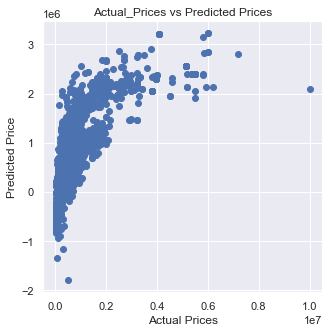

In [151]:
#Visualisng the actual prices and the predicted prices
plt.scatter(y_train,training_data_prediction1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

In [115]:
#prediction on test data
test_data_prediction1 = lin_reg.predict(X_test)

In [116]:
#R squared error
test_error_score1 = metrics.r2_score(y_test,test_data_prediction1)
print('R squared Error',test_error_score1)

R squared Error 0.5732186089678111


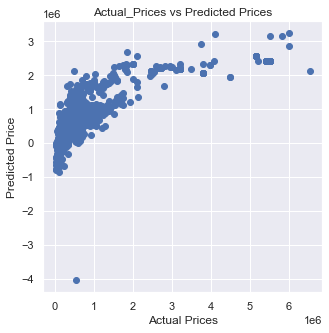

In [144]:
#Visualisng the actual prices and the predicted prices
plt.scatter(y_test,test_data_prediction1)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

##### 2. Lasso Regression

In [118]:
# loading the Lasso Regression model
lasso_reg = Lasso()

In [119]:
#Training the model
lasso_reg.fit(X_train,y_train)

Lasso()

In [120]:
#prediction on training data
training_data_prediction2 = lasso_reg.predict(X_train)

In [121]:
#R squared error
train_error_score2 = metrics.r2_score(y_train,training_data_prediction2)
print('R squared Error',train_error_score2)

R squared Error 0.5674726990323404


Text(0.5, 1.0, 'Actual_Prices vs Predicted Prices')

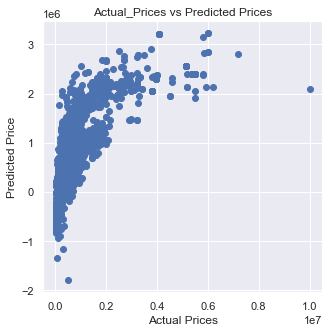

In [145]:
#Visualising the actual prices and the predicted prices
plt.scatter(y_train,training_data_prediction2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

In [123]:
#prediction on test data
test_data_prediction2 = lasso_reg.predict(X_test)

In [124]:
#R squared error
test_error_score2 = metrics.r2_score(y_test,test_data_prediction2)
print('R squared Error',test_error_score2)

R squared Error 0.5732179840334997


Text(0.5, 1.0, 'Actual_Prices vs Predicted Prices')

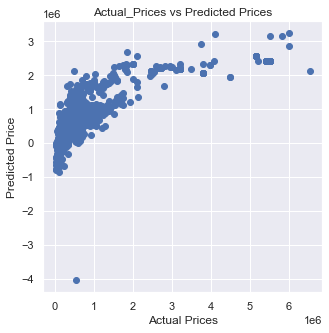

In [146]:
#Visualisng the actual prices and the predicted prices
plt.scatter(y_test,test_data_prediction2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

##### 3. Decision Tree

In [126]:
# loading the Lasso Decision Tree model
tree_model = tree.DecisionTreeClassifier()

In [127]:
#training the model
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [128]:
#prediction on training data
training_data_prediction3 = tree_model.predict(X_train)

In [129]:
#R squared error
train_error_score3 = metrics.r2_score(y_train,training_data_prediction3)
print('R squared Error',train_error_score3)

R squared Error 0.9991832617193759


Text(0.5, 1.0, 'Actual_Prices vs Predicted Prices')

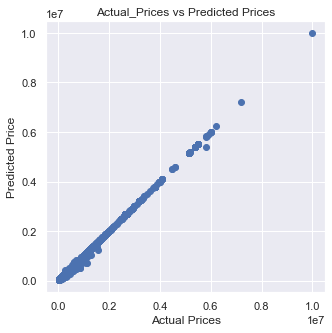

In [147]:
#Visualising the actual prices and the predicted prices
plt.scatter(y_train,training_data_prediction3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

In [131]:
#prediction on test data
test_data_prediction3 = tree_model.predict(X_test)

In [132]:
#R squared error
test_error_score3 = metrics.r2_score(y_test,test_data_prediction3)
print('R squared Error',test_error_score3)

R squared Error 0.9459830948918542


Text(0.5, 1.0, 'Actual_Prices vs Predicted Prices')

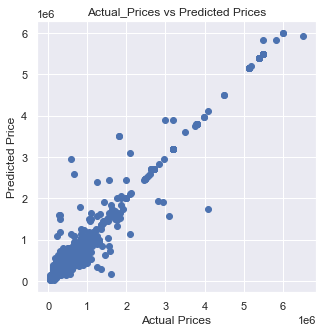

In [148]:
#Visualisng the actual prices and the predicted prices
plt.scatter(y_test,test_data_prediction3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

##### 4. Random Forest Classifier

In [134]:
# loading the Random Forest Classifier
RFC= RandomForestClassifier()

In [135]:
#training the model
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
#prediction on training data
training_data_prediction4 = RFC.predict(X_train)

In [137]:
#R squared error
train_error_score4 = metrics.r2_score(y_train,training_data_prediction4)
print('R squared Error',train_error_score4)

R squared Error 0.9993172044716216


Text(0.5, 1.0, 'Actual_Prices vs Predicted Prices')

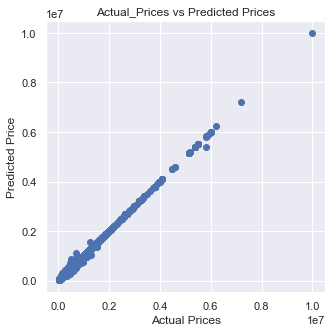

In [149]:
#Visualising the actual prices and the predicted prices
plt.scatter(y_train,training_data_prediction4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

In [139]:
#prediction on test data
test_data_prediction4= RFC.predict(X_test)

In [140]:
#R squared error
test_error_score4 = metrics.r2_score(y_test,test_data_prediction4)
print('R squared Error',test_error_score4)

R squared Error 0.9663939439126684


Text(0.5, 1.0, 'Actual_Prices vs Predicted Prices')

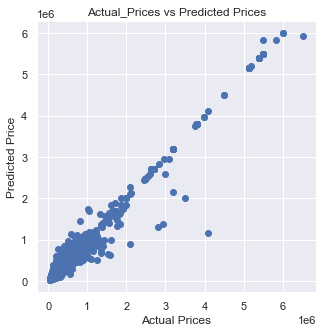

In [150]:
#Visualising the actual prices and the predicted prices
plt.scatter(y_test,test_data_prediction4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual_Prices vs Predicted Prices')

In [142]:
#we compare the abobe models based on train score and test score
compare_models = pd.DataFrame(
    {  'Model' : ['Linear Reg', 'Lasso Reg' ,'Decision Tree', 'Random Forest Classifier'],
       'train score' : [train_error_score1,train_error_score2,train_error_score3,train_error_score4],     
       'test score' : [test_error_score1, test_error_score2,test_error_score3,test_error_score4]
    })
compare_models

,Model,train score,test score
0,Linear Reg,0.567473,0.573219
1,Lasso Reg,0.567473,0.573218
2,Decision Tree,0.999183,0.945983
3,Random Forest Classifier,0.999317,0.966394


<div style="color:white;
            display:fill;
            border-radius:5px;
            background-color:#ffefd5;  
            font-size:100%;
            theme:cosmo;
            letter-spacing:0.5px">
<h3 style="padding-left: 20px; padding-top: 20px; color:#4a4a4a; font-family:Arial;"><b>Conclusion:</b>
</h3>
<ul style="padding-left: 40px; padding-bottom: 20px; color:#4a4a4a; font-size:110%;">
    <li><b>Random Forest Classifier</b> is the best among the chosen models.</li>
    <li>On test data it has <b>99%</b> accuracy.</li>
    <li>On train data it has <b>96%</b> accuracy.</li>

</ul>
</div>

<b>Author :</b> Gulshan Acharjee

<b>Dataset Source:</b> Kaggle